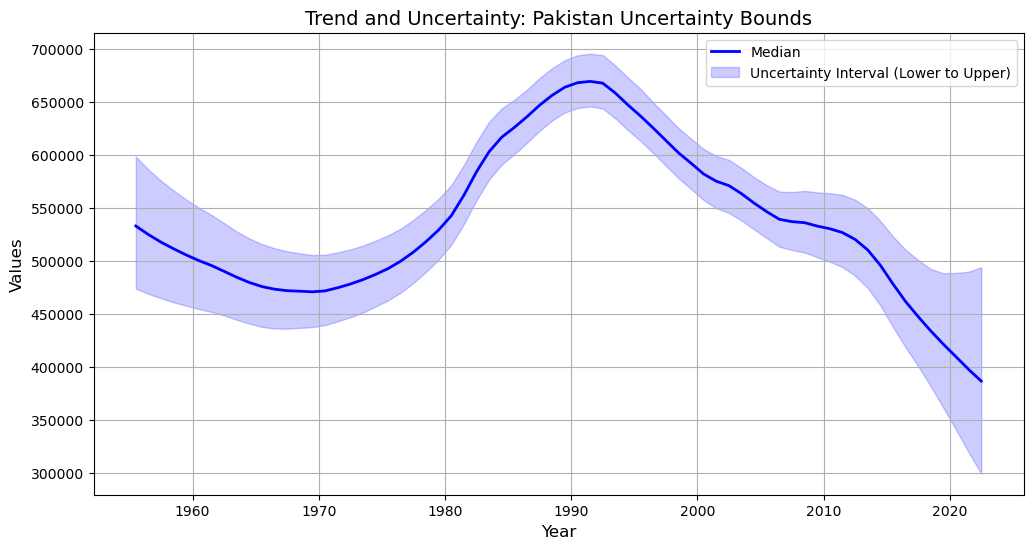

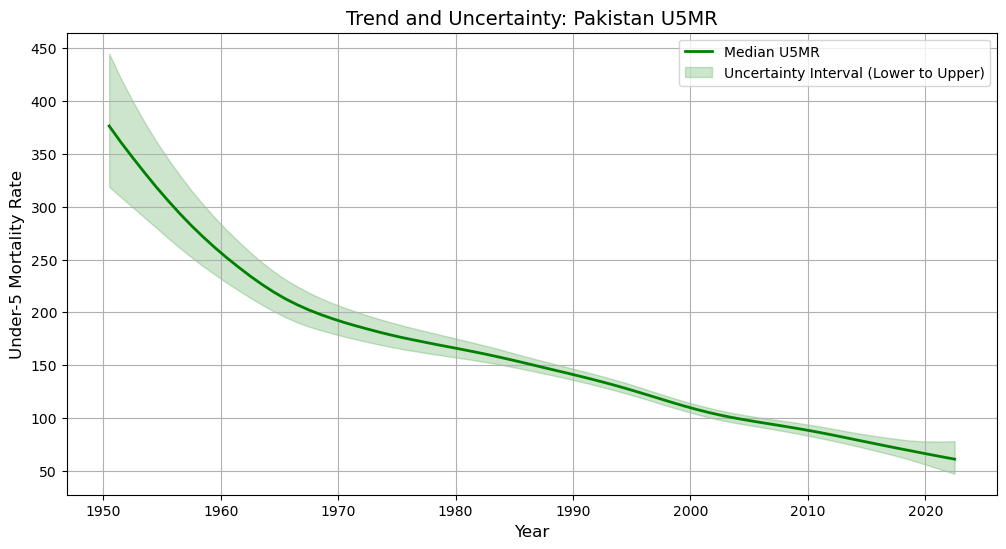

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "D:\\M5inpakistan.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame
uncertainty_bounds = excel_data.parse("pakistanUncertainty.Bounds")
u5mr = excel_data.parse("pakistanU5MR")

# Plot trends for "pakistanUncertainty.Bounds"
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds["year"], uncertainty_bounds["Median"], label="Median", color="blue", linewidth=2)
plt.fill_between(
    uncertainty_bounds["year"],
    uncertainty_bounds["Lower"],
    uncertainty_bounds["Upper"],
    color="blue",
    alpha=0.2,
    label="Uncertainty Interval (Lower to Upper)"
)
plt.title("Trend and Uncertainty: Pakistan Uncertainty Bounds", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Plot trends for "pakistanU5MR"
plt.figure(figsize=(12, 6))
plt.plot(u5mr["year"], u5mr["Median"], label="Median U5MR", color="green", linewidth=2)
plt.fill_between(
    u5mr["year"],
    u5mr["Lower"],
    u5mr["Upper"],
    color="green",
    alpha=0.2,
    label="Uncertainty Interval (Lower to Upper)"
)
plt.title("Trend and Uncertainty: Pakistan U5MR", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Under-5 Mortality Rate", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


--- Uncertainty Bounds Summary ---
               Lower         Median          Upper
count      68.000000      68.000000      68.000000
mean   500680.308824  535398.161765  572772.338235
std     82256.264491   71943.546098   61448.130827
min    299034.000000  386364.000000  488115.000000
25%    446019.500000  481405.000000  520384.250000
50%    487615.000000  525555.500000  564006.500000
75%    559763.500000  585854.750000  612804.750000
max    645412.000000  669065.000000  695158.000000


--- U5MR Summary ---
            Lower      Median       Upper
count   73.000000   73.000000   73.000000
mean   149.484809  162.463428  176.687880
std     67.976550   78.581689   91.084773
min     47.152133   60.959900   77.658611
25%     94.013844   98.465146  102.861055
50%    144.488766  150.410728  156.566792
75%    183.108929  197.951916  213.356992
max    318.881108  376.513055  444.918889


Correlation between Median values of both datasets: -0.08


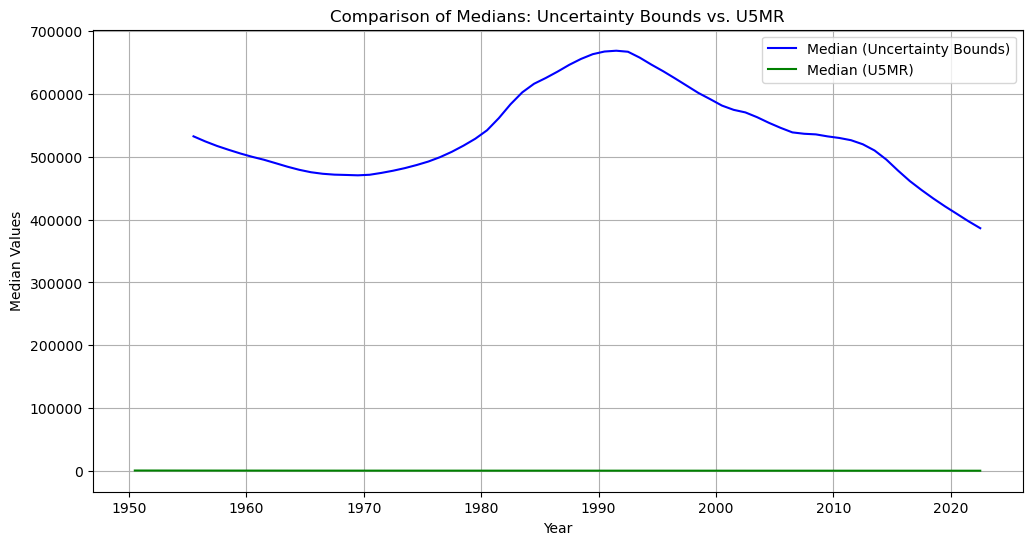

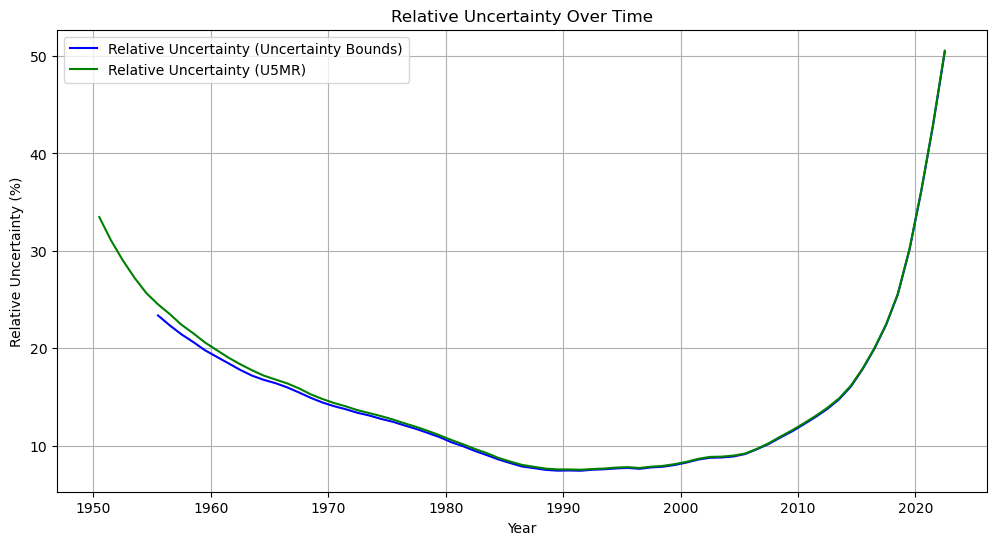

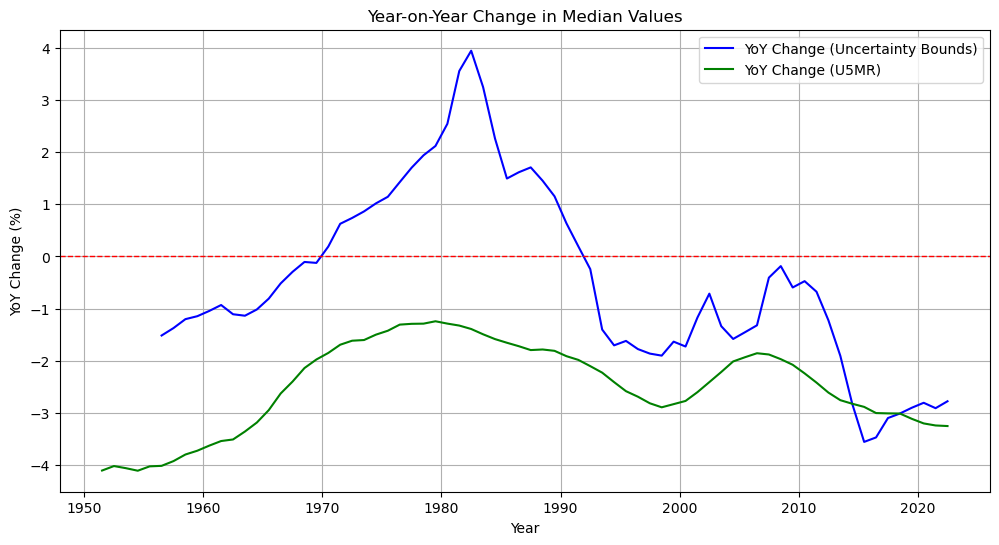

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "D:\\M5inpakistan.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load data from sheets
uncertainty_bounds = excel_data.parse("pakistanUncertainty.Bounds")
u5mr = excel_data.parse("pakistanU5MR")

# --- Statistical Summary ---
def print_summary(data, name):
    print(f"--- {name} Summary ---")
    print(data.describe())
    print("\n")

print_summary(uncertainty_bounds[['Lower', 'Median', 'Upper']], "Uncertainty Bounds")
print_summary(u5mr[['Lower', 'Median', 'Upper']], "U5MR")

# --- Year-on-Year Percentage Change ---
uncertainty_bounds['YoY_Change_Median'] = uncertainty_bounds['Median'].pct_change() * 100
u5mr['YoY_Change_Median'] = u5mr['Median'].pct_change() * 100

# --- Uncertainty Spread and Relative Uncertainty ---
uncertainty_bounds['Spread'] = uncertainty_bounds['Upper'] - uncertainty_bounds['Lower']
uncertainty_bounds['Relative_Uncertainty'] = (uncertainty_bounds['Spread'] / uncertainty_bounds['Median']) * 100

u5mr['Spread'] = u5mr['Upper'] - u5mr['Lower']
u5mr['Relative_Uncertainty'] = (u5mr['Spread'] / u5mr['Median']) * 100

# --- Correlation Analysis ---
correlation = uncertainty_bounds['Median'].corr(u5mr['Median'])
print(f"Correlation between Median values of both datasets: {correlation:.2f}")

# --- Visualization ---
# Median with Year-on-Year Change
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Median'], label='Median (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Median'], label='Median (U5MR)', color='green')
plt.title("Comparison of Medians: Uncertainty Bounds vs. U5MR")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend()
plt.grid(True)
plt.show()

# Spread and Relative Uncertainty
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Relative_Uncertainty'], label='Relative Uncertainty (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Relative_Uncertainty'], label='Relative Uncertainty (U5MR)', color='green')
plt.title("Relative Uncertainty Over Time")
plt.xlabel("Year")
plt.ylabel("Relative Uncertainty (%)")
plt.legend()
plt.grid(True)
plt.show()

# Year-on-Year Change
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['YoY_Change_Median'], label='YoY Change (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['YoY_Change_Median'], label='YoY Change (U5MR)', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Year-on-Year Change in Median Values")
plt.xlabel("Year")
plt.ylabel("YoY Change (%)")
plt.legend()
plt.grid(True)
plt.show()


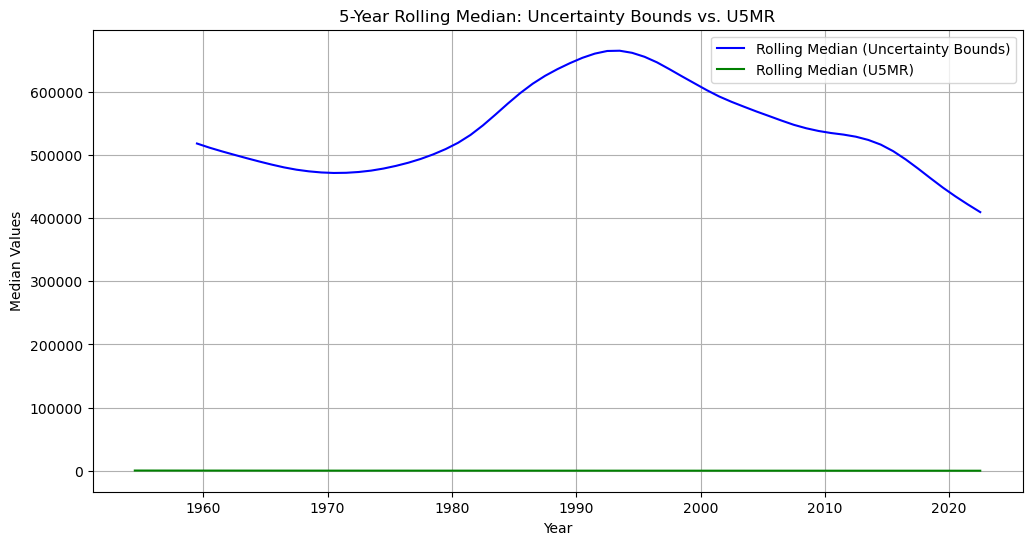

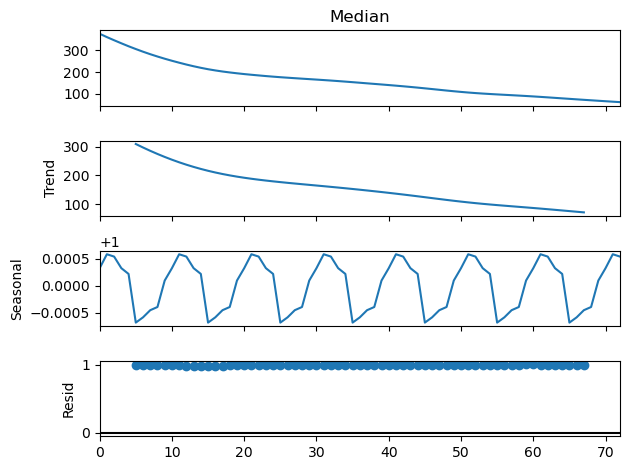

Forecast for next 10 years: 73    58.927092
74    56.895679
75    54.865661
76    52.837037
77    50.809804
78    48.783964
79    46.759514
80    44.736453
81    42.714781
82    40.694497
Name: predicted_mean, dtype: float64


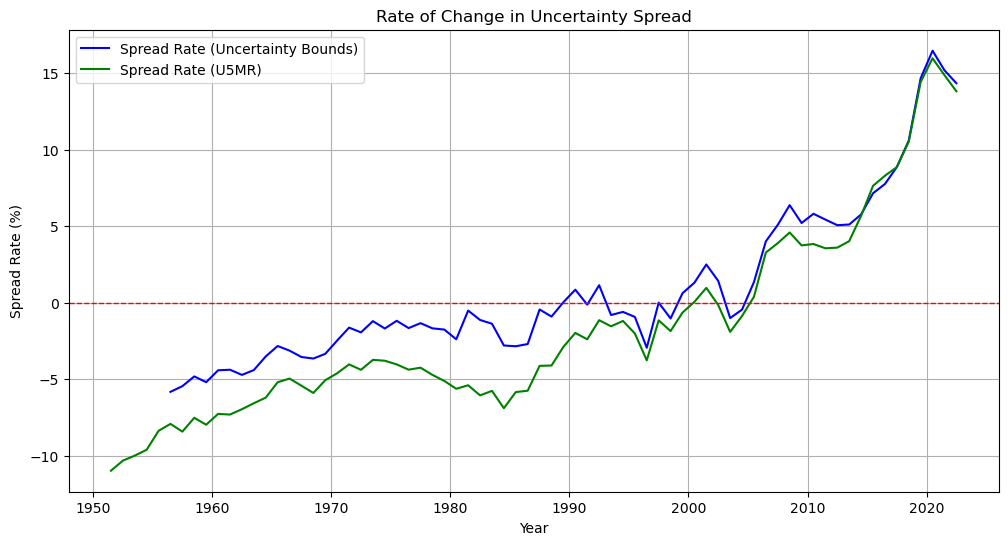

Shape of Uncertainty Bounds Median: (68,)
Shape of U5MR Median: (73,)
Shape of Merged DataFrame: (68, 13)
First few rows of the merged data:
     year  Lower_uncertainty  Median_uncertainty  Upper_uncertainty  \
0  1955.5             473527              532688             598061   
1  1956.5             468643              524612             585923   
2  1957.5             464515              517406             575399   
3  1958.5             460657              511184             566200   
4  1959.5             457507              505327             557569   

   Rolling_Median_uncertainty  Spread_uncertainty  Spread_Rate_uncertainty  \
0                         NaN              124534                      NaN   
1                         NaN              117280                -5.824915   
2                         NaN              110884                -5.453615   
3                         NaN              105543                -4.816745   
4                    518243.4             

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 68 and the array at index 1 has size 73

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind

# Load the Excel file
file_path = "D:\\M5inpakistan.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load data from sheets
uncertainty_bounds = excel_data.parse("pakistanUncertainty.Bounds")
u5mr = excel_data.parse("pakistanU5MR")

# --- Advanced Statistical and Time Series Analysis ---

# 1. Trend Detection: Rolling Averages
uncertainty_bounds['Rolling_Median'] = uncertainty_bounds['Median'].rolling(window=5).mean()
u5mr['Rolling_Median'] = u5mr['Median'].rolling(window=5).mean()

# Plot Rolling Averages
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Rolling_Median'], label='Rolling Median (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Rolling_Median'], label='Rolling Median (U5MR)', color='green')
plt.title("5-Year Rolling Median: Uncertainty Bounds vs. U5MR")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend()
plt.grid(True)
plt.show()

# 2. Seasonality and Trend Decomposition (for U5MR)
u5mr_decompose = seasonal_decompose(u5mr['Median'], model='multiplicative', period=10)
u5mr_decompose.plot()
plt.show()

# 3. Forecasting with ARIMA (for U5MR)
model = ARIMA(u5mr['Median'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print("Forecast for next 10 years:", forecast)

# 4. Uncertainty Analysis: Rate of Change
uncertainty_bounds['Spread'] = uncertainty_bounds['Upper'] - uncertainty_bounds['Lower']
u5mr['Spread'] = u5mr['Upper'] - u5mr['Lower']

uncertainty_bounds['Spread_Rate'] = uncertainty_bounds['Spread'].pct_change() * 100
u5mr['Spread_Rate'] = u5mr['Spread'].pct_change() * 100

# Plot Spread Rate
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Spread_Rate'], label='Spread Rate (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Spread_Rate'], label='Spread Rate (U5MR)', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Rate of Change in Uncertainty Spread")
plt.xlabel("Year")
plt.ylabel("Spread Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Correlation Analysis Between Datasets
# Step 1: Check the shapes of both datasets
print("Shape of Uncertainty Bounds Median:", uncertainty_bounds['Median'].shape)
print("Shape of U5MR Median:", u5mr['Median'].shape)

# Step 2: Merge the datasets on 'year' to align them
merged_df = pd.merge(uncertainty_bounds, u5mr, on='year', suffixes=('_uncertainty', '_u5mr'))

# Step 3: Verify the alignment
print("Shape of Merged DataFrame:", merged_df.shape)
print("First few rows of the merged data:")
print(merged_df.head())

# Step 4: Calculate correlation on aligned data
correlation = np.corrcoef(merged_df['Median_uncertainty'], merged_df['Median_u5mr'])[0, 1]
print(f"Correlation between aligned Median values: {correlation}")

correlation = np.corrcoef(uncertainty_bounds['Median'], u5mr['Median'])[0, 1]
print(f"Correlation between Medians of the datasets: {correlation:.2f}")

# 6. Hypothesis Testing: Are Uncertainty Spreads Significantly Different?
t_stat, p_value = ttest_ind(uncertainty_bounds['Spread'], u5mr['Spread'], nan_policy='omit')
print(f"T-Test Result: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The difference in uncertainty spreads between the two datasets is statistically significant.")
else:
    print("The difference in uncertainty spreads between the two datasets is not statistically significant.")


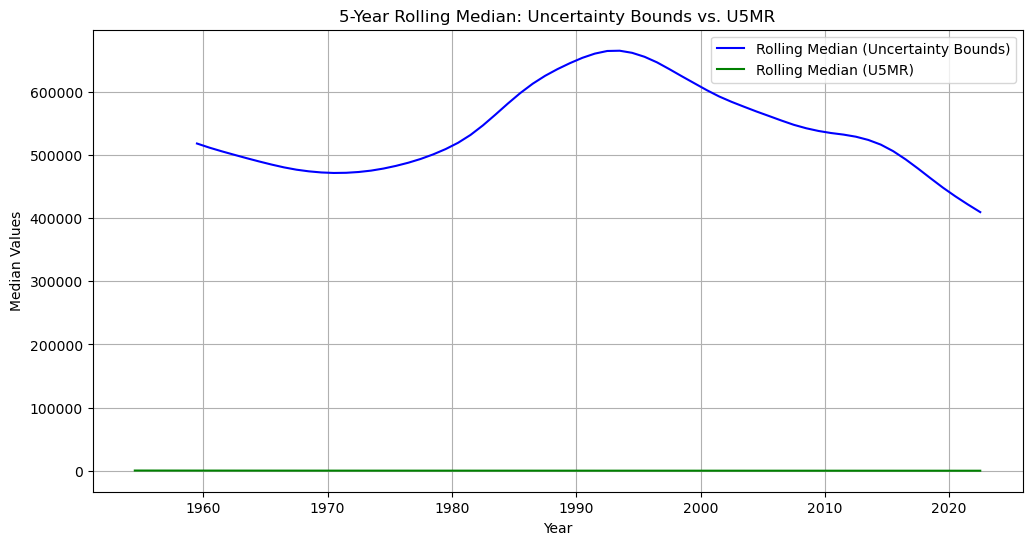

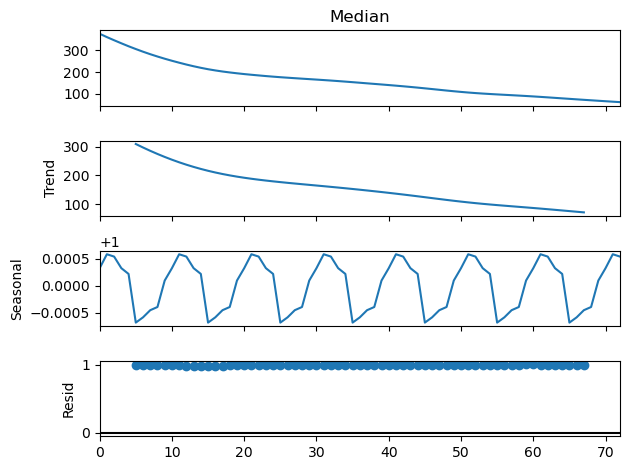

Forecast for next 10 years: 73    58.927092
74    56.895679
75    54.865661
76    52.837037
77    50.809804
78    48.783964
79    46.759514
80    44.736453
81    42.714781
82    40.694497
Name: predicted_mean, dtype: float64


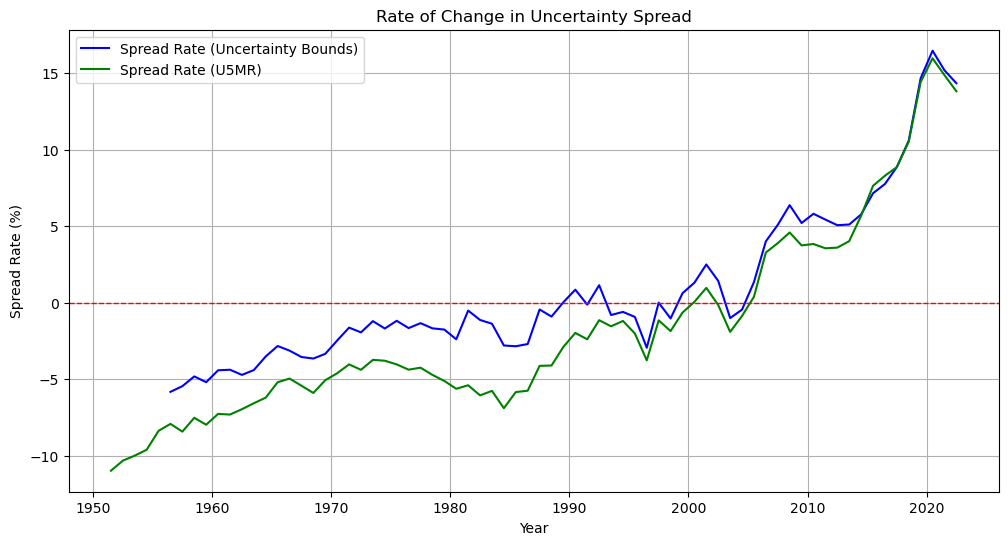

Shape of Merged DataFrame: (68, 3)
First few rows of the merged data:
     year  Median_uncertainty  Median_u5mr
0  1955.5              532688   305.970728
1  1956.5              524612   293.682318
2  1957.5              517406   282.155140
3  1958.5              511184   271.436589
4  1959.5              505327   261.323405
Correlation between aligned Median values: -0.04
T-Test Result: t-statistic = 20.47, p-value = 0.0000
The difference in uncertainty spreads between the two datasets is statistically significant.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind

# Load the Excel file
file_path = "D:\\M5inpakistan.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load data from sheets
uncertainty_bounds = excel_data.parse("pakistanUncertainty.Bounds")
u5mr = excel_data.parse("pakistanU5MR")

# --- Advanced Statistical and Time Series Analysis ---

# 1. Trend Detection: Rolling Averages
uncertainty_bounds['Rolling_Median'] = uncertainty_bounds['Median'].rolling(window=5).mean()
u5mr['Rolling_Median'] = u5mr['Median'].rolling(window=5).mean()

# Plot Rolling Averages
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Rolling_Median'], label='Rolling Median (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Rolling_Median'], label='Rolling Median (U5MR)', color='green')
plt.title("5-Year Rolling Median: Uncertainty Bounds vs. U5MR")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend()
plt.grid(True)
plt.show()

# 2. Seasonality and Trend Decomposition (for U5MR)
u5mr_decompose = seasonal_decompose(u5mr['Median'], model='multiplicative', period=10)
u5mr_decompose.plot()
plt.show()

# 3. Forecasting with ARIMA (for U5MR)
model = ARIMA(u5mr['Median'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print("Forecast for next 10 years:", forecast)

# 4. Uncertainty Analysis: Rate of Change
uncertainty_bounds['Spread'] = uncertainty_bounds['Upper'] - uncertainty_bounds['Lower']
u5mr['Spread'] = u5mr['Upper'] - u5mr['Lower']

uncertainty_bounds['Spread_Rate'] = uncertainty_bounds['Spread'].pct_change() * 100
u5mr['Spread_Rate'] = u5mr['Spread'].pct_change() * 100

# Plot Spread Rate
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Spread_Rate'], label='Spread Rate (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Spread_Rate'], label='Spread Rate (U5MR)', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Rate of Change in Uncertainty Spread")
plt.xlabel("Year")
plt.ylabel("Spread Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Correlation Analysis Between Datasets
# Step 1: Merge the datasets on 'year' to align them
merged_df = pd.merge(uncertainty_bounds[['year', 'Median']], u5mr[['year', 'Median']], on='year', suffixes=('_uncertainty', '_u5mr'))

# Step 2: Verify the alignment
print("Shape of Merged DataFrame:", merged_df.shape)
print("First few rows of the merged data:")
print(merged_df.head())

# Step 3: Calculate correlation on aligned data
correlation = np.corrcoef(merged_df['Median_uncertainty'], merged_df['Median_u5mr'])[0, 1]
print(f"Correlation between aligned Median values: {correlation:.2f}")

# 6. Hypothesis Testing: Are Uncertainty Spreads Significantly Different?
t_stat, p_value = ttest_ind(uncertainty_bounds['Spread'], u5mr['Spread'], nan_policy='omit')
print(f"T-Test Result: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The difference in uncertainty spreads between the two datasets is statistically significant.")
else:
    print("The difference in uncertainty spreads between the two datasets is not statistically significant.")


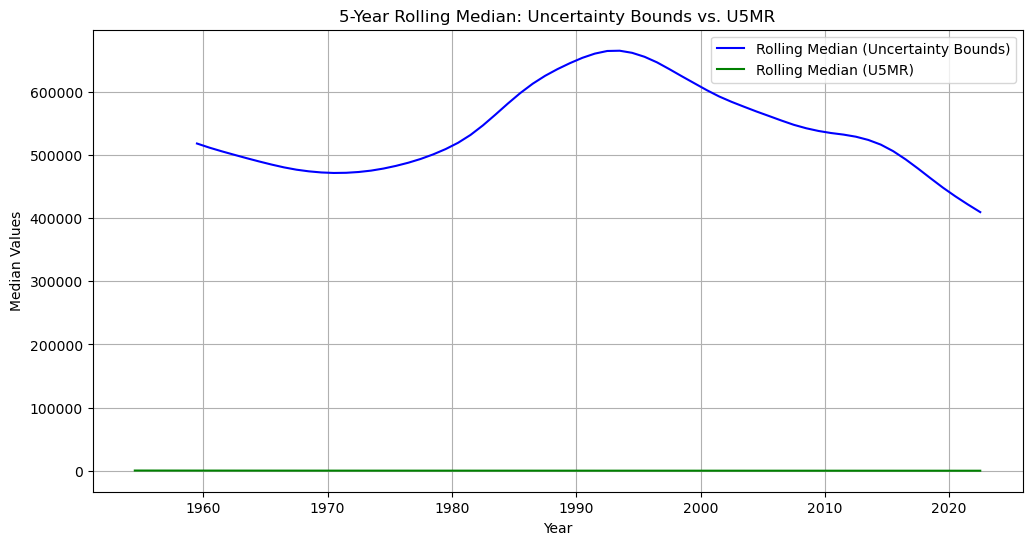

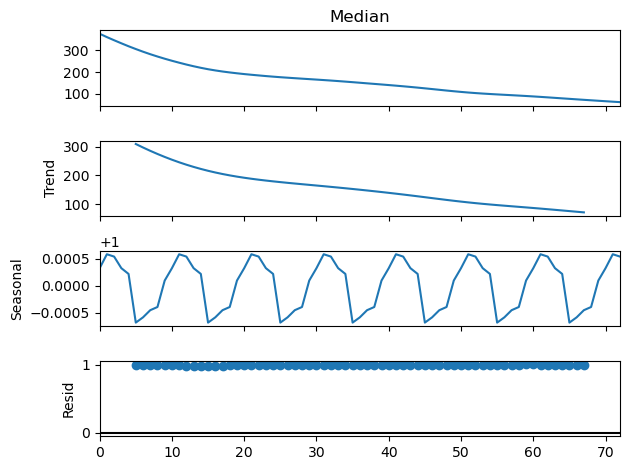

Forecast for next 10 years: 73    58.927092
74    56.895679
75    54.865661
76    52.837037
77    50.809804
78    48.783964
79    46.759514
80    44.736453
81    42.714781
82    40.694497
Name: predicted_mean, dtype: float64
Forecast for next 7 years: 73    58.927092
74    56.895679
75    54.865661
76    52.837037
77    50.809804
78    48.783964
79    46.759514
Name: predicted_mean, dtype: float64


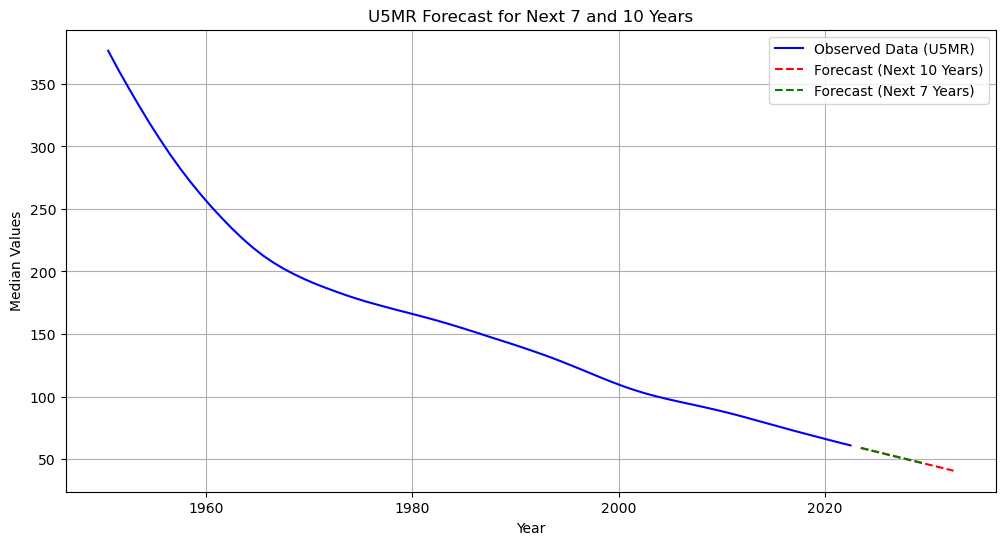

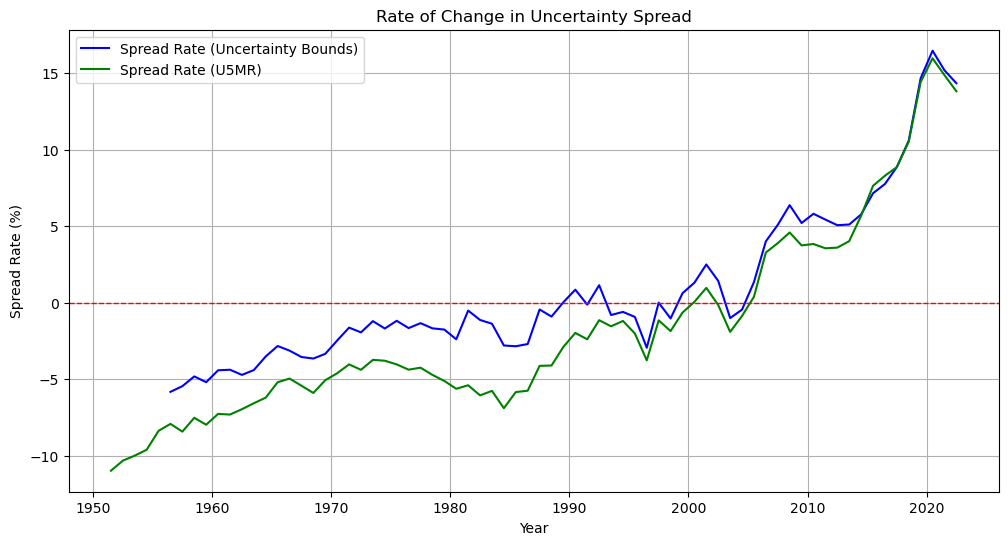

Shape of Merged DataFrame: (68, 3)
First few rows of the merged data:
     year  Median_uncertainty  Median_u5mr
0  1955.5              532688   305.970728
1  1956.5              524612   293.682318
2  1957.5              517406   282.155140
3  1958.5              511184   271.436589
4  1959.5              505327   261.323405
Correlation between aligned Median values: -0.04
T-Test Result: t-statistic = 20.47, p-value = 0.0000
The difference in uncertainty spreads between the two datasets is statistically significant.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind

# Load the Excel file
file_path = "D:\\M5inpakistan.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load data from sheets
uncertainty_bounds = excel_data.parse("pakistanUncertainty.Bounds")
u5mr = excel_data.parse("pakistanU5MR")

# --- Advanced Statistical and Time Series Analysis ---

# 1. Trend Detection: Rolling Averages
uncertainty_bounds['Rolling_Median'] = uncertainty_bounds['Median'].rolling(window=5).mean()
u5mr['Rolling_Median'] = u5mr['Median'].rolling(window=5).mean()

# Plot Rolling Averages
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Rolling_Median'], label='Rolling Median (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Rolling_Median'], label='Rolling Median (U5MR)', color='green')
plt.title("5-Year Rolling Median: Uncertainty Bounds vs. U5MR")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend()
plt.grid(True)
plt.show()

# 2. Seasonality and Trend Decomposition (for U5MR)
u5mr_decompose = seasonal_decompose(u5mr['Median'], model='multiplicative', period=10)
u5mr_decompose.plot()
plt.show()

# 3. Forecasting with ARIMA (for U5MR)
# ARIMA Model for Forecasting Next 10 Years
model = ARIMA(u5mr['Median'], order=(1, 1, 1))  # ARIMA model order (p, d, q)
model_fit = model.fit()
forecast_10_years = model_fit.forecast(steps=10)
print("Forecast for next 10 years:", forecast_10_years)

# Forecasting Next 7 Years
forecast_7_years = model_fit.forecast(steps=7)
print("Forecast for next 7 years:", forecast_7_years)

# Plotting the forecasts (10 years and 7 years)
plt.figure(figsize=(12, 6))
plt.plot(u5mr['year'], u5mr['Median'], label='Observed Data (U5MR)', color='blue')
future_years_10 = np.arange(u5mr['year'].iloc[-1] + 1, u5mr['year'].iloc[-1] + 11)
future_years_7 = np.arange(u5mr['year'].iloc[-1] + 1, u5mr['year'].iloc[-1] + 8)
plt.plot(future_years_10, forecast_10_years, label='Forecast (Next 10 Years)', color='red', linestyle='--')
plt.plot(future_years_7, forecast_7_years, label='Forecast (Next 7 Years)', color='green', linestyle='--')
plt.title("U5MR Forecast for Next 7 and 10 Years")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend()
plt.grid(True)
plt.show()

# 4. Uncertainty Analysis: Rate of Change
uncertainty_bounds['Spread'] = uncertainty_bounds['Upper'] - uncertainty_bounds['Lower']
u5mr['Spread'] = u5mr['Upper'] - u5mr['Lower']

uncertainty_bounds['Spread_Rate'] = uncertainty_bounds['Spread'].pct_change() * 100
u5mr['Spread_Rate'] = u5mr['Spread'].pct_change() * 100

# Plot Spread Rate
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Spread_Rate'], label='Spread Rate (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Spread_Rate'], label='Spread Rate (U5MR)', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Rate of Change in Uncertainty Spread")
plt.xlabel("Year")
plt.ylabel("Spread Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Correlation Analysis Between Datasets
# Step 1: Merge the datasets on 'year' to align them
merged_df = pd.merge(uncertainty_bounds[['year', 'Median']], u5mr[['year', 'Median']], on='year', suffixes=('_uncertainty', '_u5mr'))

# Step 2: Verify the alignment
print("Shape of Merged DataFrame:", merged_df.shape)
print("First few rows of the merged data:")
print(merged_df.head())

# Step 3: Calculate correlation on aligned data
correlation = np.corrcoef(merged_df['Median_uncertainty'], merged_df['Median_u5mr'])[0, 1]
print(f"Correlation between aligned Median values: {correlation:.2f}")

# 6. Hypothesis Testing: Are Uncertainty Spreads Significantly Different?
t_stat, p_value = ttest_ind(uncertainty_bounds['Spread'], u5mr['Spread'], nan_policy='omit')
print(f"T-Test Result: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The difference in uncertainty spreads between the two datasets is statistically significant.")
else:
    print("The difference in uncertainty spreads between the two datasets is not statistically significant.")


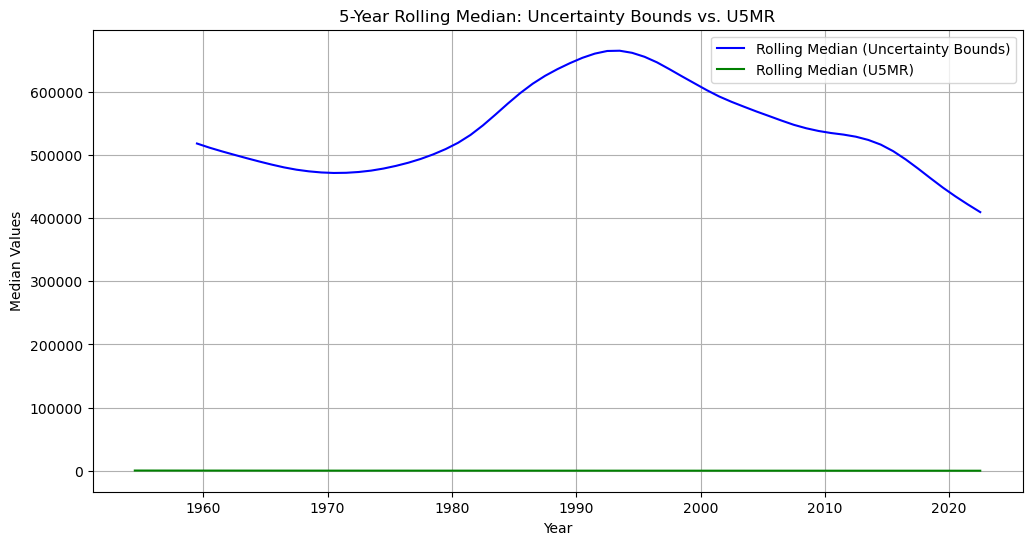

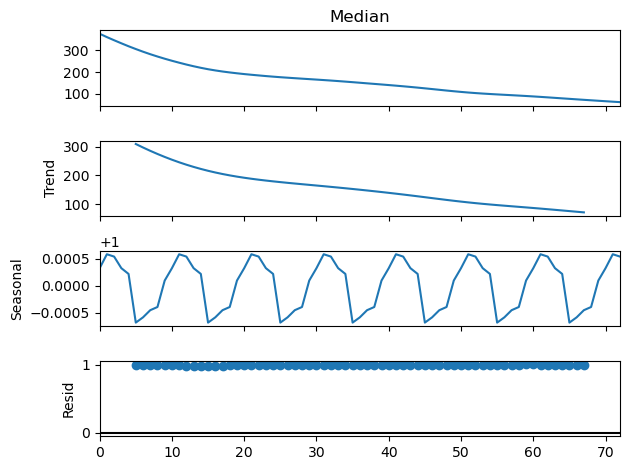

Forecast for next 10 years: 73    58.927092
74    56.895679
75    54.865661
76    52.837037
77    50.809804
78    48.783964
79    46.759514
80    44.736453
81    42.714781
82    40.694497
Name: predicted_mean, dtype: float64
Forecast for next 7 years: 73    58.927092
74    56.895679
75    54.865661
76    52.837037
77    50.809804
78    48.783964
79    46.759514
Name: predicted_mean, dtype: float64


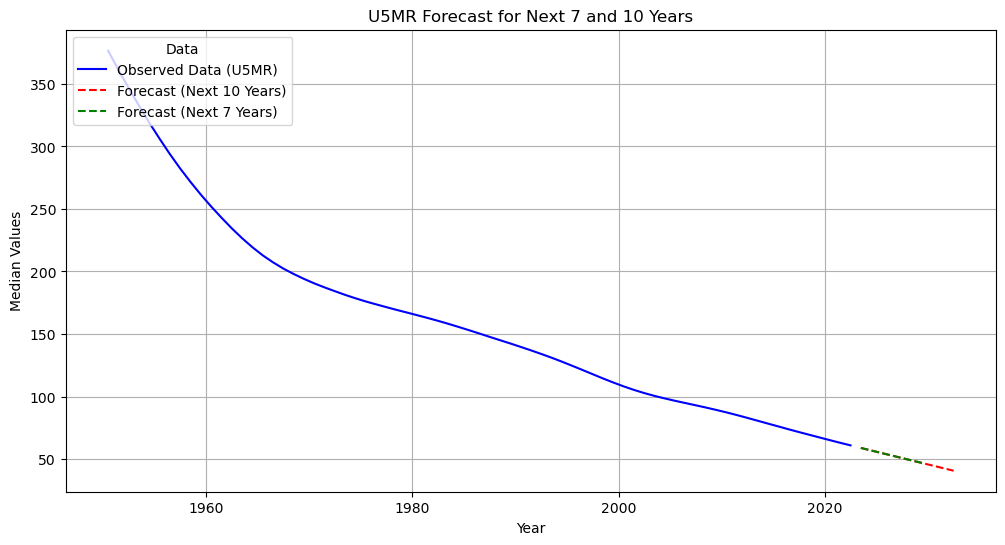

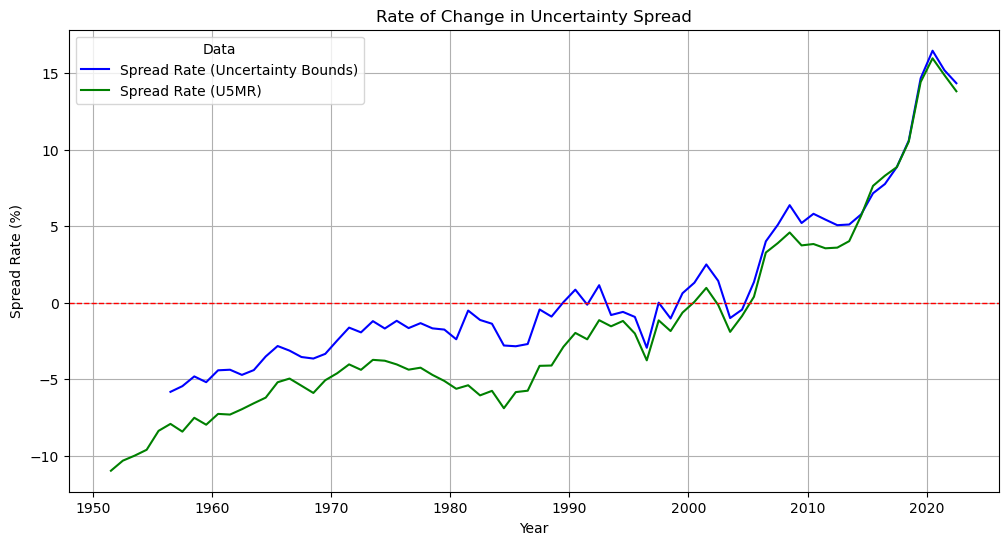

Shape of Merged DataFrame: (68, 3)
First few rows of the merged data:
     year  Median_uncertainty  Median_u5mr
0  1955.5              532688   305.970728
1  1956.5              524612   293.682318
2  1957.5              517406   282.155140
3  1958.5              511184   271.436589
4  1959.5              505327   261.323405
Correlation between aligned Median values: -0.04
T-Test Result: t-statistic = 20.47, p-value = 0.0000
The difference in uncertainty spreads between the two datasets is statistically significant.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import ttest_ind

# Load the Excel file
file_path = "D:\\M5inpakistan.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load data from sheets
uncertainty_bounds = excel_data.parse("pakistanUncertainty.Bounds")
u5mr = excel_data.parse("pakistanU5MR")

# --- Advanced Statistical and Time Series Analysis ---

# 1. Trend Detection: Rolling Averages
uncertainty_bounds['Rolling_Median'] = uncertainty_bounds['Median'].rolling(window=5).mean()
u5mr['Rolling_Median'] = u5mr['Median'].rolling(window=5).mean()

# Plot Rolling Averages
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Rolling_Median'], label='Rolling Median (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Rolling_Median'], label='Rolling Median (U5MR)', color='green')
plt.title("5-Year Rolling Median: Uncertainty Bounds vs. U5MR")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend()
plt.grid(True)
plt.show()

# 2. Seasonality and Trend Decomposition (for U5MR)
u5mr_decompose = seasonal_decompose(u5mr['Median'], model='multiplicative', period=10)
u5mr_decompose.plot()
plt.show()

# 3. Forecasting with ARIMA (for U5MR)
# ARIMA Model for Forecasting Next 10 Years
model = ARIMA(u5mr['Median'], order=(1, 1, 1))  # ARIMA model order (p, d, q)
model_fit = model.fit()
forecast_10_years = model_fit.forecast(steps=10)
print("Forecast for next 10 years:", forecast_10_years)

# Forecasting Next 7 Years
forecast_7_years = model_fit.forecast(steps=7)
print("Forecast for next 7 years:", forecast_7_years)

# Plotting the forecasts (10 years and 7 years)
plt.figure(figsize=(12, 6))
plt.plot(u5mr['year'], u5mr['Median'], label='Observed Data (U5MR)', color='blue')
future_years_10 = np.arange(u5mr['year'].iloc[-1] + 1, u5mr['year'].iloc[-1] + 11)
future_years_7 = np.arange(u5mr['year'].iloc[-1] + 1, u5mr['year'].iloc[-1] + 8)
plt.plot(future_years_10, forecast_10_years, label='Forecast (Next 10 Years)', color='red', linestyle='--')
plt.plot(future_years_7, forecast_7_years, label='Forecast (Next 7 Years)', color='green', linestyle='--')
plt.title("U5MR Forecast for Next 7 and 10 Years")
plt.xlabel("Year")
plt.ylabel("Median Values")
plt.legend(title="Data", loc='upper left')  # Add legend title and set location
plt.grid(True)
plt.show()

# 4. Uncertainty Analysis: Rate of Change
uncertainty_bounds['Spread'] = uncertainty_bounds['Upper'] - uncertainty_bounds['Lower']
u5mr['Spread'] = u5mr['Upper'] - u5mr['Lower']

uncertainty_bounds['Spread_Rate'] = uncertainty_bounds['Spread'].pct_change() * 100
u5mr['Spread_Rate'] = u5mr['Spread'].pct_change() * 100

# Plot Spread Rate
plt.figure(figsize=(12, 6))
plt.plot(uncertainty_bounds['year'], uncertainty_bounds['Spread_Rate'], label='Spread Rate (Uncertainty Bounds)', color='blue')
plt.plot(u5mr['year'], u5mr['Spread_Rate'], label='Spread Rate (U5MR)', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Rate of Change in Uncertainty Spread")
plt.xlabel("Year")
plt.ylabel("Spread Rate (%)")
plt.legend(title="Data", loc='upper left')  # Add legend title and set location
plt.grid(True)
plt.show()

# 5. Correlation Analysis Between Datasets
# Step 1: Merge the datasets on 'year' to align them
merged_df = pd.merge(uncertainty_bounds[['year', 'Median']], u5mr[['year', 'Median']], on='year', suffixes=('_uncertainty', '_u5mr'))

# Step 2: Verify the alignment
print("Shape of Merged DataFrame:", merged_df.shape)
print("First few rows of the merged data:")
print(merged_df.head())

# Step 3: Calculate correlation on aligned data
correlation = np.corrcoef(merged_df['Median_uncertainty'], merged_df['Median_u5mr'])[0, 1]
print(f"Correlation between aligned Median values: {correlation:.2f}")

# 6. Hypothesis Testing: Are Uncertainty Spreads Significantly Different?
t_stat, p_value = ttest_ind(uncertainty_bounds['Spread'], u5mr['Spread'], nan_policy='omit')
print(f"T-Test Result: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The difference in uncertainty spreads between the two datasets is statistically significant.")
else:
    print("The difference in uncertainty spreads between the two datasets is not statistically significant.")
